In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import KFold
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [145]:
#reading the data file
df=pd.read_csv("c:/users/anany/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
def make_x(df, var_names):
    """Given a DataFrame and a list of explanatory variables, one-hot encodes
    variables if they are categorical and returns a dataframe with 
    all the given explanatory variables."""
    categorical = ["Sex", "Embarked"]
    
    X = pd.DataFrame({"intercept":np.ones(df.shape[0], dtype='int')}, index = df.index)
    for var in var_names:
        if var in categorical:
            dummies = pd.get_dummies(df[var])
            formatted = dummies.drop(dummies.columns[-1], axis=1)
        else:
            formatted = df.loc[:, var]
        X = X.join(formatted)
      
    return X

In [147]:
# pd.get_dummies is a function that does dummy encoding
categorical = pd.DataFrame({"Sex": ["female", "male"]})
categorical

,Sex
0,female
1,male


In [148]:
one_hot = pd.get_dummies(categorical['Sex'])
one_hot
one_hot.drop("female", axis=1)

,male
0,0
1,1


In [149]:
categorical = pd.DataFrame({"Embarked": ["C", "S","Q"]})
one_hot = pd.get_dummies(categorical['Embarked'])
one_hot
one_hot.drop("C", axis=1)

,Q,S
0,0,0
1,0,1
2,1,0


In [150]:
expl_vars=["Pclass","Sex","Age","Embarked","SibSp","Parch"]

In [151]:
x_train=make_x(df,expl_vars)
x_train

,intercept,Pclass,female,Age,C,Q,SibSp,Parch
0,1,3,0,22.0,0,0,1,0
1,1,1,1,38.0,1,0,1,0
2,1,3,1,26.0,0,0,0,0
3,1,1,1,35.0,0,0,1,0
4,1,3,0,35.0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,1,2,0,27.0,0,0,0,0
887,1,1,1,19.0,0,0,0,0
888,1,3,1,NaN,0,0,1,2
889,1,1,0,26.0,1,0,0,0


In [152]:
df['Age'].isnull().values.any()

True

In [153]:
df['Embarked'].isnull().values.any()

True

In [154]:
df['SibSp'].isnull().values.any()

False

In [155]:
df['Parch'].isnull().values.any()

False

In [156]:
df['Sex'].isnull().values.any()

False

In [157]:
df['Pclass'].isnull().values.any()

False

In [158]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer = imputer.fit(df['Age'])
#SimpleImputer()
df.Age = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]

In [159]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
df['Age'].isnull().values.any()

False

In [161]:
df['Embarked'].isnull().values.any()

True

In [162]:
expl_vars=["Pclass","Sex","Age","Embarked","SibSp","Parch"]

In [163]:
x_train=make_x(df,expl_vars)
x_train

,intercept,Pclass,female,Age,C,Q,SibSp,Parch
0,1,3,0,22.000000,0,0,1,0
1,1,1,1,38.000000,1,0,1,0
2,1,3,1,26.000000,0,0,0,0
3,1,1,1,35.000000,0,0,1,0
4,1,3,0,35.000000,0,0,0,0
...,...,...,...,...,...,...,...,...
886,1,2,0,27.000000,0,0,0,0
887,1,1,1,19.000000,0,0,0,0
888,1,3,1,29.699118,0,0,1,2
889,1,1,0,26.000000,1,0,0,0


In [164]:
x_train['C'].isnull().values.any()

False

In [165]:
x_train['Q'].isnull().values.any()

False

<Axes: xlabel='Parch', ylabel='Count'>

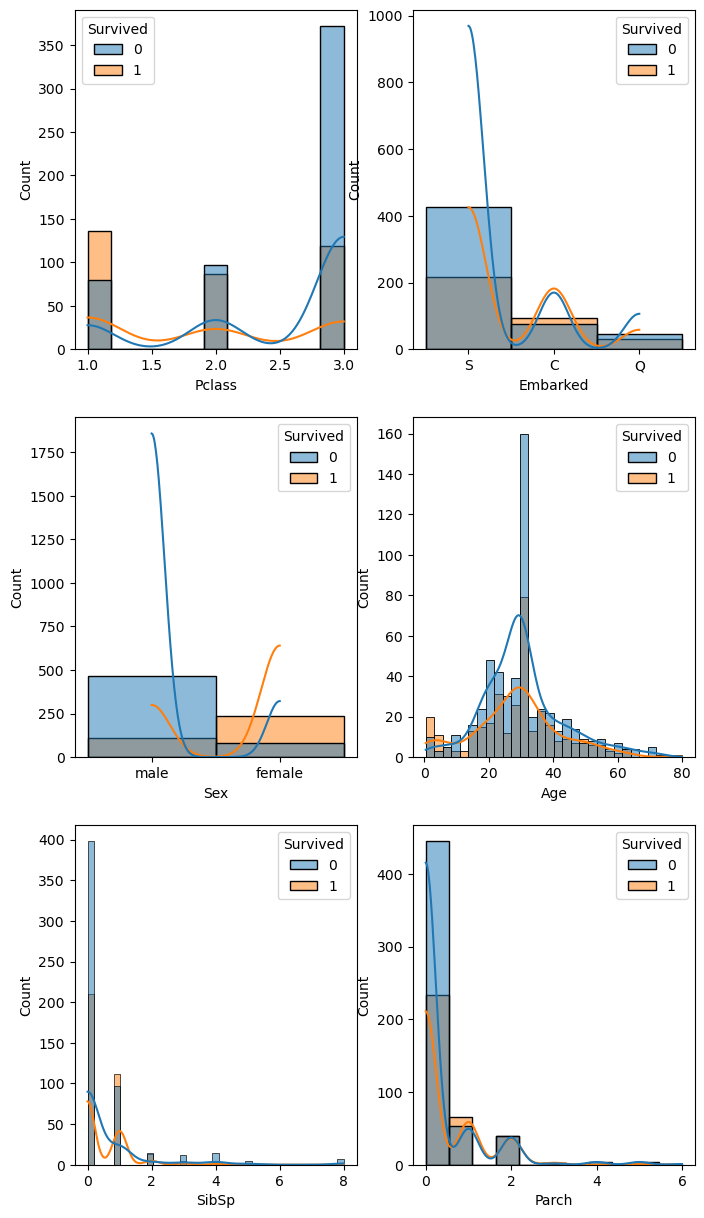

In [166]:
#Showing how all the factors varies in diabetic and non-diabetic patients
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(8,15))
sns.histplot(data=df, x="Pclass",  label="Pclass", kde=True,ax=axs[0,0],hue="Survived")
sns.histplot(data=df, x="Embarked", label="mbarked", kde=True,ax=axs[0,1],hue="Survived")
sns.histplot(data=df, x="Sex", label="Sex", kde=True,ax=axs[1,0],hue="Survived")
sns.histplot(data=df, x="Age", label="Age", kde=True,ax=axs[1,1],hue="Survived")
sns.histplot(data=df, x="SibSp", label="Siblings", kde=True,ax=axs[2,0],hue="Survived")
sns.histplot(data=df, x="Parch", label="Parents", kde=True,ax=axs[2,1],hue="Survived")


In [167]:
dftest=pd.read_csv("c:/users/anany/test.csv")
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
x_test=make_x(dftest,expl_vars)
x_test

,intercept,Pclass,female,Age,C,Q,SibSp,Parch
0,1,3,0,34.5,0,1,0,0
1,1,3,1,47.0,0,0,1,0
2,1,2,0,62.0,0,1,0,0
3,1,3,0,27.0,0,0,0,0
4,1,3,1,22.0,0,0,1,1
...,...,...,...,...,...,...,...,...
413,1,3,0,NaN,0,0,0,0
414,1,1,1,39.0,1,0,0,0
415,1,3,0,38.5,0,0,0,0
416,1,3,0,NaN,0,0,0,0


In [169]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer = imputer.fit(df['Age'])
#SimpleImputer()
x_test.Age = imputer.fit_transform(x_test['Age'].values.reshape(-1,1))[:,0]

In [170]:
x_test['Age'].isnull().values.any()

False

In [171]:
y_train=df["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [172]:
#Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [173]:
# r square score which is very less
regr.score(x_train,y_train)

0.39765258344600896

In [174]:
#using Logistic Regression Analysis
regr1=linear_model.LogisticRegression()
regr1.fit(x_train, y_train)

C:\Users\anany\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
#r2 score which comparatively good
regr1.score(x_train, y_train)

0.8058361391694725

In [176]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =3, random_state = 28)

dtc.fit(x_train, y_train)

predicted = dtc.predict(x_test)

In [177]:
predicted

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [178]:
output=pd.DataFrame(data={"PassengerID":dftest["PassengerId"], "Survived":predicted})
predicted=output.to_csv("prediction3.csv", index=False)

In [179]:
dtc.score(x_train, y_train)

0.8170594837261503

In [180]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNeighborsClassifier


# knn = ..

knn = KNeighborsClassifier()

In [181]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [182]:
# use the fitted knn model to predict for the test data
knn_predictions = knn.predict(x_test)

In [183]:
knn_score = knn.score(x_train, y_train)

# show the score
knn_score

0.8507295173961841

In [184]:
# Classifier using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [185]:
# Random Forest fit and score
rf_model.fit(x_train, y_train)
rfpredict=rf_model.predict(x_test)

rf_model_score = rf_model.score(x_train, y_train)

rf_model_score

0.9371492704826038

In [194]:
output=pd.DataFrame(data={"PassengerID":dftest["PassengerId"], "Survived":rfpredict})
predicted=output.to_csv("prediction5.csv", index=False)

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()

In [192]:
gbc_model.fit(x_train, y_train)
gbc_predict=gbc_model.predict(x_test)

gbc_model_score = gbc_model.score(x_train, y_train)

gbc_model_score

0.867564534231201

In [195]:
output=pd.DataFrame(data={"PassengerID":dftest["PassengerId"], "Survived":gbc_predict})
predicted=output.to_csv("prediction6.csv", index=False)